In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

plt.style.use("default")
sns.set_context("talk")


In [3]:
# ---- PATH CONFIG ----
BASE_PATH = r"E:\people-analytics\data\PETA\PETA dataset"
SUBSET = "CUHK"

IMAGE_DIR = os.path.join(BASE_PATH, SUBSET, "archive")
LABEL_PATH = os.path.join(IMAGE_DIR, "Label.txt")

# ---- PARSE LABEL FILE ----
records = []

with open(LABEL_PATH, "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        image_name = parts[0]
        attributes = parts[1:]

        image_path = os.path.join(IMAGE_DIR, image_name)

        if os.path.exists(image_path):
            records.append({
                "image_path": image_path,
                "attributes": attributes
            })

df = pd.DataFrame(records)

print("Total samples:", len(df))
df.head()


Total samples: 4563


,image_path,attributes
0,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyGrey, lowerBodyGrey, hairBlack, foot..."
1,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyBlack, lowerBodyGrey, hairBlack, foo..."
2,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyGrey, lowerBodyBrown, hairBlack, foo..."
3,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyBlack, upperBodyBlue, lowerBodyBlack..."
4,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyRed, lowerBodyBlue, hairBlack, footw..."


In [4]:
# Define attribute subset for analysis & modeling
selected_attributes = [
    "personalMale",
    "personalFemale",
    "personalLess30",
    "personalLess45",
    "upperBodyCasual",
    "upperBodyFormal",
    "upperBodyJacket",
    "upperBodyTshirt",
    "lowerBodyJeans",
    "lowerBodyTrousers",
    "carryingBackpack",
    "carryingMessengerBag"
]

# Multi-hot encode
for attr in selected_attributes:
    df[attr] = df["attributes"].apply(lambda x: 1 if attr in x else 0)

df[selected_attributes].head()


,personalMale,personalFemale,personalLess30,personalLess45,upperBodyCasual,upperBodyFormal,upperBodyJacket,upperBodyTshirt,lowerBodyJeans,lowerBodyTrousers,carryingBackpack,carryingMessengerBag
0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,1,0,0,1
2,1,0,1,0,1,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,0,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   image_path            4563 non-null   object
 1   attributes            4563 non-null   object
 2   personalMale          4563 non-null   int64 
 3   personalFemale        4563 non-null   int64 
 4   personalLess30        4563 non-null   int64 
 5   personalLess45        4563 non-null   int64 
 6   upperBodyCasual       4563 non-null   int64 
 7   upperBodyFormal       4563 non-null   int64 
 8   upperBodyJacket       4563 non-null   int64 
 9   upperBodyTshirt       4563 non-null   int64 
 10  lowerBodyJeans        4563 non-null   int64 
 11  lowerBodyTrousers     4563 non-null   int64 
 12  carryingBackpack      4563 non-null   int64 
 13  carryingMessengerBag  4563 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 499.2+ KB


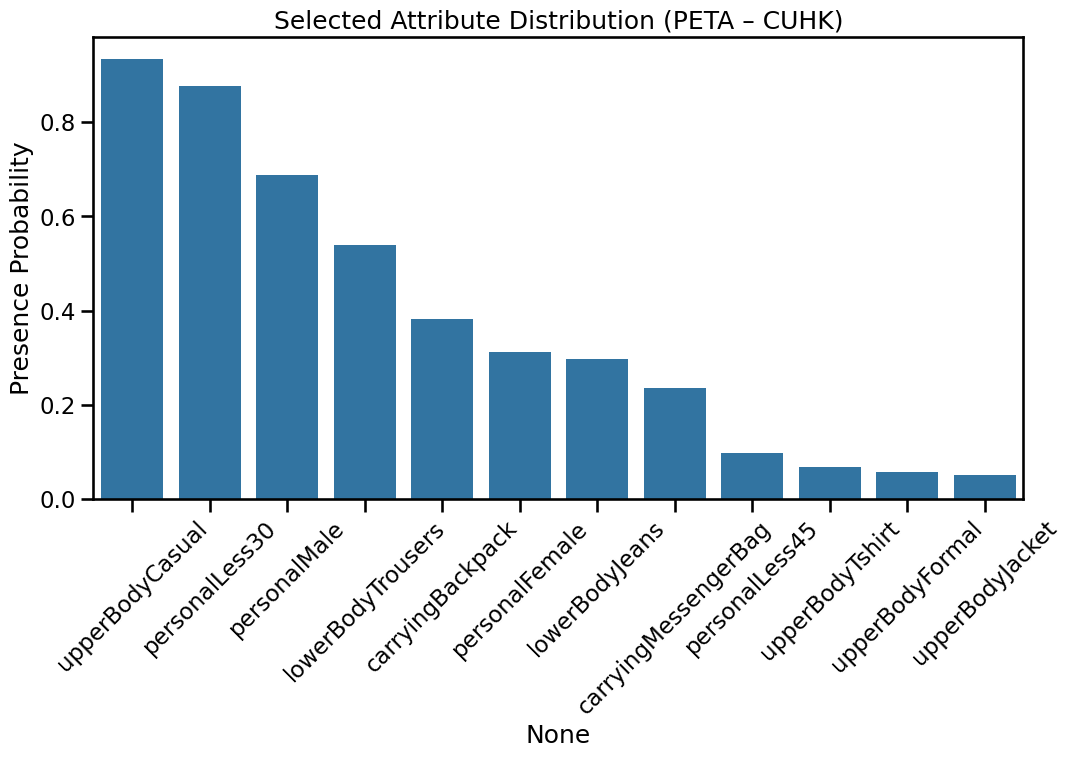

In [6]:
attr_means = df[selected_attributes].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=attr_means.index, y=attr_means.values)
plt.xticks(rotation=45)
plt.ylabel("Presence Probability")
plt.title("Selected Attribute Distribution (PETA – CUHK)")
plt.show()


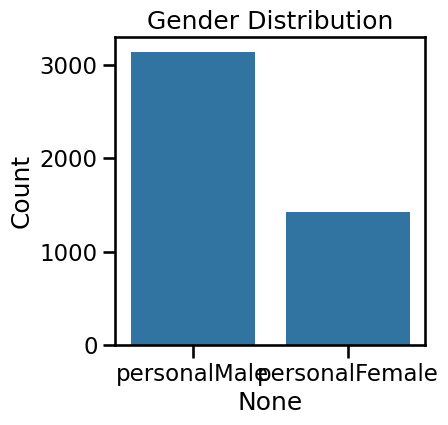

In [7]:
gender_df = df[["personalMale", "personalFemale"]].sum()

plt.figure(figsize=(4, 4))
sns.barplot(x=gender_df.index, y=gender_df.values)
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()


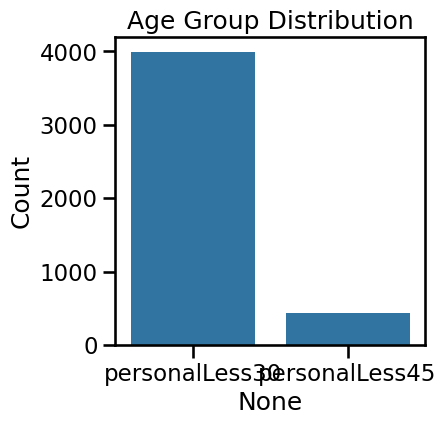

In [8]:
age_df = df[["personalLess30", "personalLess45"]].sum()

plt.figure(figsize=(4, 4))
sns.barplot(x=age_df.index, y=age_df.values)
plt.title("Age Group Distribution")
plt.ylabel("Count")
plt.show()


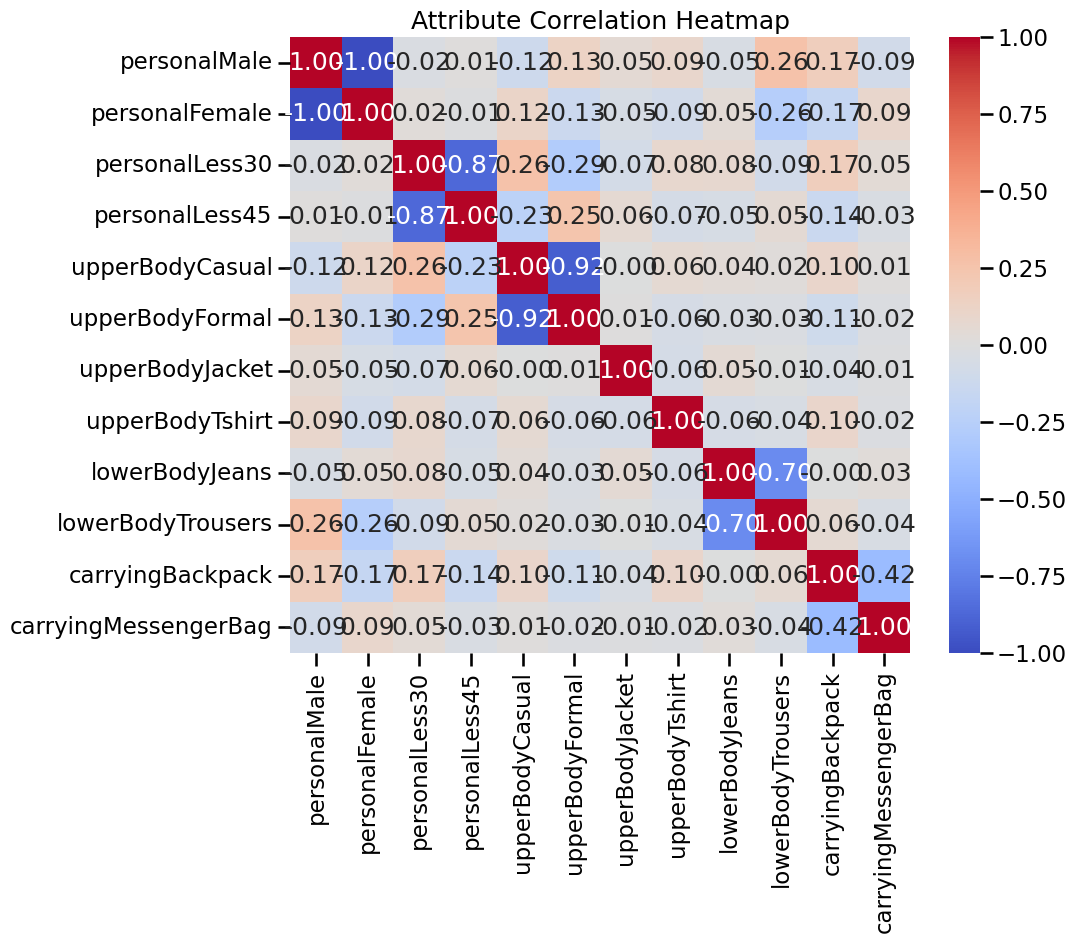

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[selected_attributes].corr(),
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Attribute Correlation Heatmap")
plt.show()


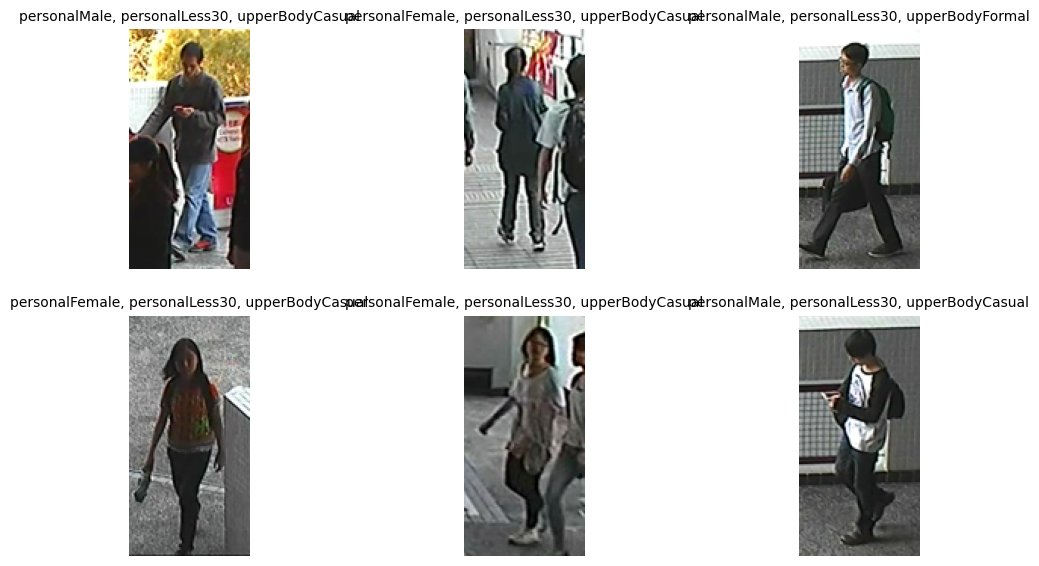

In [10]:
sample_rows = df.sample(6, random_state=42)

plt.figure(figsize=(12, 6))

for i, (_, row) in enumerate(sample_rows.iterrows()):
    img = Image.open(row["image_path"]).convert("RGB")

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")

    active_attrs = [a for a in selected_attributes if row[a] == 1]
    plt.title(", ".join(active_attrs[:3]), fontsize=10)

plt.tight_layout()
plt.show()


In [11]:
df[selected_attributes].describe()


,personalMale,personalFemale,personalLess30,personalLess45,upperBodyCasual,upperBodyFormal,upperBodyJacket,upperBodyTshirt,lowerBodyJeans,lowerBodyTrousers,carryingBackpack,carryingMessengerBag
count,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000
mean,0.687705,0.312295,0.875520,0.096866,0.933596,0.057638,0.051720,0.068376,0.297830,0.538681,0.381986,0.234714
std,0.463480,0.463480,0.330164,0.295808,0.249014,0.233082,0.221486,0.252418,0.457355,0.498556,0.485926,0.423866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
